In [29]:
import pandas as pd 
data = pd.read_csv("datasets/carprices.csv")
data

,Car_Model,Mileage,Sell_Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


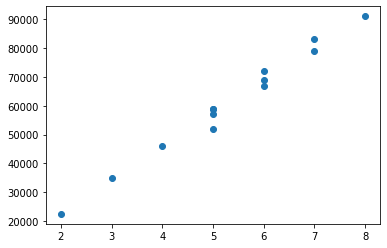

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sn 
plt.scatter(data.Age, data.Mileage )

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


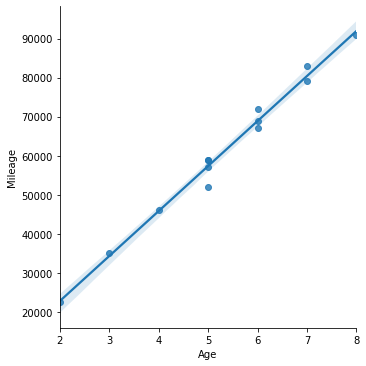

In [12]:
sn.lmplot( 'Age','Mileage', data)

In [16]:
import sklearn.linear_model as sk

regression = sk.LinearRegression()

In [21]:
regression.fit(data[['Age', 'Mileage']], data[['Sell_Price']])

LinearRegression()

In [22]:
regression.predict([[4, 45000]])

array([[32153.36258054]])

In [23]:
regression.predict([[7, 86000]])

array([[16427.33120935]])

In [32]:
regression.score(data[['Age', 'Mileage']], data[['Sell_Price']])

0.8595807839881059

In [ ]:
#Here in the above notes, category data the model is text which needs to be converted to numerical data if prediction involves the models too. So below is using dummies & hot encoder


In [33]:
dummies = pd.get_dummies(data['Car_Model'])

In [34]:
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [35]:
data

,Car_Model,Mileage,Sell_Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [43]:
#now merge dummies+data
merged = pd.concat([data, dummies], axis='columns')
merged

,Car_Model,Mileage,Sell_Price,Age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [48]:
#drop the car_model column
final = merged.drop(['Car_Model', 'Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell_Price,Age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [49]:
Y = final['Sell_Price']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price, dtype: int64

In [52]:
X = final.drop('Sell_Price', axis='columns')
X

,Mileage,Age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [53]:
model = sk.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [54]:
model.score(X,Y)

0.9417050937281083

In [55]:
model.predict([[45000, 4, 0, 0 ]])

array([36991.31721061])

In [56]:
model.predict([[86000, 7, 0, 1 ]])

array([11080.74313219])

In [68]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

In [69]:
len(X_Train)

10

In [72]:
len(Y_Test)

3

In [73]:
regression.fit(X_Train, Y_Train)

LinearRegression()

In [74]:
regression.predict(X_Test)

array([28740.2951282 , 24266.50910608, 22982.62596572])

In [76]:
Y_Test

4    31500
7    19300
2    26100
Name: Sell_Price, dtype: int64

In [77]:
regression.score(X_Test, Y_Test)

0.4380992969617603